In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os
import random
import time


In [23]:
def show(img, figsize=(10, 10), title="Image"):
    figure=plt.figure(figsize=figsize)
    
    plt.imshow(img, cmap='gray')
    plt.show()

In [24]:
def get_size(filename):
    stat = os.stat(filename)
    size=stat.st_size
    return size

In [25]:
def RLE_encoding(img, bits=8,  binary=True, view=True):
    """
    img: Grayscale img.
    bits: what will be the maximum run length? 2^bits       
    """
    if binary:
        ret,img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    if view:
        show(img)

    encoded = []
    shape=img.shape
    count = 0
    prev = None
    fimg = img.flatten()
    th=127
    for pixel in fimg:
        if binary:
            if pixel<th:
                pixel=0
            else:
                pixel=1
        if prev==None:
            prev = pixel
            count+=1
        else:
            if prev!=pixel:
                encoded.append((count, prev))
                prev=pixel
                count=1
            else:
                if count<(2**bits)-1:
                    count+=1
                else:
                    encoded.append((count, prev))
                    prev=pixel
                    count=1
    encoded.append((count, prev))
    
    return np.array(encoded)


In [26]:
def RLE_decode(encoded, shape):
    decoded=[]
    for rl in encoded:
        r,p = rl[0], rl[1]
        decoded.extend([p]*r)
    dimg = np.array(decoded).reshape(shape)
    return dimg

Binary format

In [27]:
path = r'.\Images'

img_list = os.listdir(path)

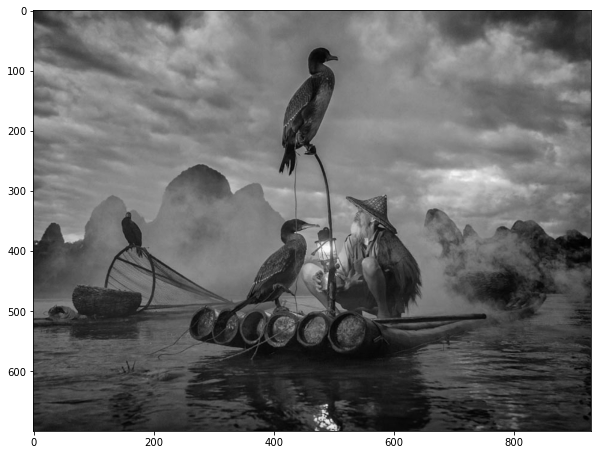

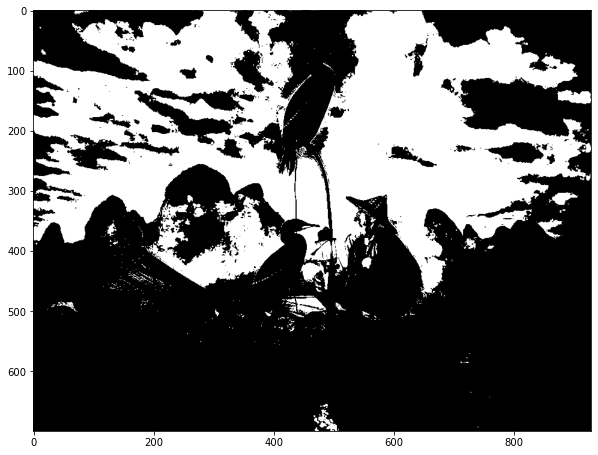

Run time: 3.1447582244873047 seconds


In [28]:
test_img = os.path.join(path, random.choice(img_list))
img = cv2.imread(test_img, 0)
show(img)
start_time = time.time()
encoded_binary = RLE_encoding(img, bits=8)
print("Run time: %s seconds" % (time.time() - start_time))

In [29]:
earr=np.array(encoded_binary)

In [30]:
cv2.imwrite("encoded_binary.tif", earr)
cv2.imwrite("encoded_binary.png", earr)
cv2.imwrite("encoded_binary.jpg", earr)

True

In [31]:
print(f"Original size: { get_size(os.path.join(path, img_list[1])) } \nJPG: {get_size('encoded_binary.jpg')} \nPNG: {get_size('encoded_binary.png')} \nTIF: {get_size('encoded_binary.tif')}")

Original size: 3602042 
JPG: 68888 
PNG: 28094 
TIF: 18834


In [32]:
hesonen = get_size(os.path.join(path, img_list[7])) / get_size('encoded_binary.png')

print(hesonen)

3.969566455470919


Non binary format of an image.



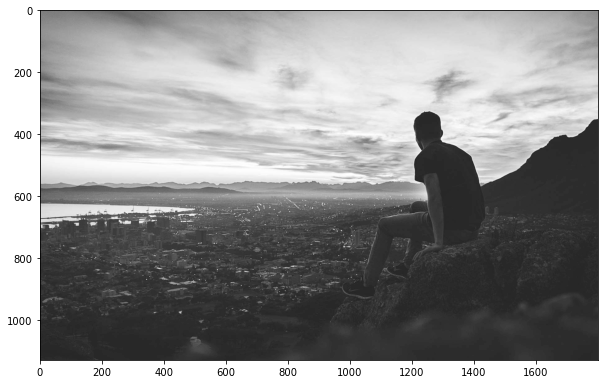

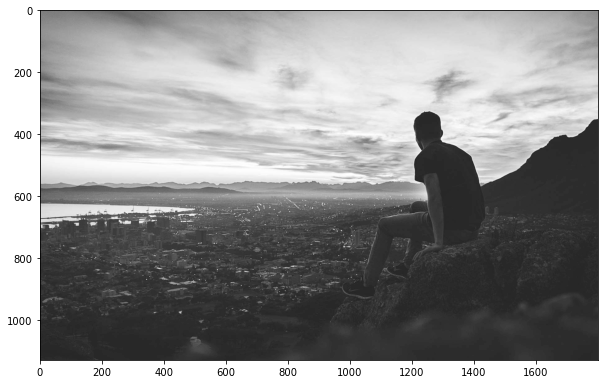

Run time: 3.8390204906463623 seconds


In [33]:
test_img = os.path.join(path, random.choice(img_list))
img_nonbi = cv2.imread(test_img, 0)
show(img_nonbi)
start_time = time.time()
encoded_nonbi = RLE_encoding(img_nonbi, bits=8, binary=False)
print("Run time: %s seconds" % (time.time() - start_time))

In [34]:
earr_nonbi = np.array(encoded_nonbi)

In [35]:
cv2.imwrite("encoded_nonbi.tif", earr_nonbi)
cv2.imwrite("encoded_nonbi.png", earr_nonbi)

True

In [36]:
print(f"Original size: { get_size(os.path.join(path, img_list[1])) }\nPNG: {get_size('encoded_nonbi.png')}\nTIF: {get_size('encoded_nonbi.tif')}")

Original size: 3602042
PNG: 1274353
TIF: 1126766


In [37]:
hesonen = get_size(os.path.join(path, img_list[1])) / get_size("encoded_nonbi.png") 
print(hesonen)

2.82656532373683


##RGB Image

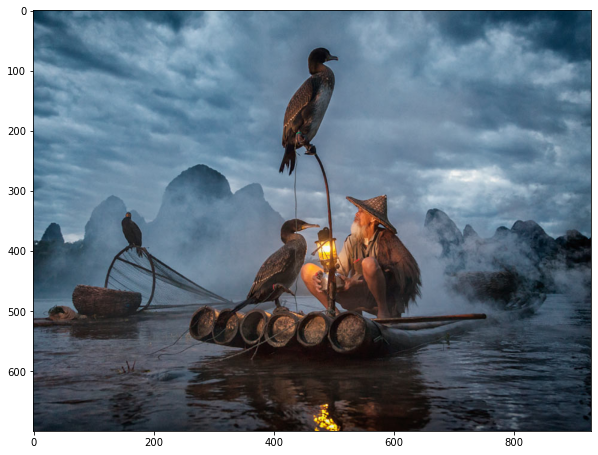

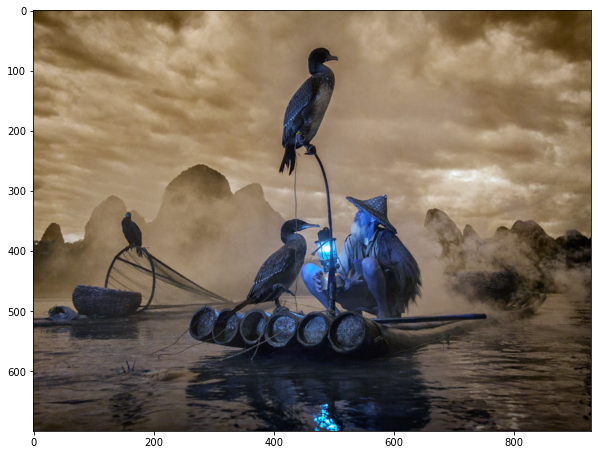

Run time: 3.4340567588806152 seconds


In [38]:
test_img = os.path.join(path, random.choice(img_list))
bgr = cv2.imread(test_img)
show(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
start_time = time.time()
img = RLE_encoding(bgr, binary = False)
print("Run time: %s seconds" % (time.time() - start_time))

In [39]:
np.savez("img.npz", img)
cv2.imwrite("img.tif", img)
# cv2.imwrite("img.png", img)


True

In [40]:
print(f"Original size: {get_size(os.path.join(path, img_list[5]))/1024} \nTIFF: {get_size('img.tif')/1024} \nNPZ: {get_size('img.npz')/1024}")


Original size: 168.0556640625 
TIFF: 2092.857421875 
NPZ: 15078.2421875


In [41]:
hesonen = get_size(os.path.join(path, img_list[5])) / get_size('img.tif') 
print(hesonen)

0.08029962400015678
